In [1]:
# import necessary modules
import matplotlib.pyplot as plt
import matplotlib.style as sty
import pandas as pd
from scipy.stats import sem, ttest_ind, linregress
import numpy as np
import os
import warnings

In [2]:
sty.use('ggplot')
warnings.filterwarnings('ignore')

In [3]:
# read in
path = os.path.join('calcs.csv')
df = pd.read_csv(path)
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0018,OAS2_0018_MR1,Converted,1,0,F,R,87,14,1.0,30.0,0.0,1406,0.715,1.248
1,OAS2_0018,OAS2_0018_MR3,Converted,3,489,F,R,88,14,1.0,29.0,0.0,1398,0.713,1.255
2,OAS2_0020,OAS2_0020_MR1,Converted,1,0,M,R,80,20,1.0,29.0,0.0,1587,0.693,1.106
3,OAS2_0031,OAS2_0031_MR1,Converted,1,0,F,R,86,12,3.0,30.0,0.0,1430,0.718,1.227
4,OAS2_0031,OAS2_0031_MR2,Converted,2,446,F,R,88,12,3.0,30.0,0.0,1445,0.719,1.215


In [4]:
# rename columns for ease-of-use
df = df.rename(columns={'M/F':'Gender',
                        'EDUC':'EDU'})
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDU,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0018,OAS2_0018_MR1,Converted,1,0,F,R,87,14,1.0,30.0,0.0,1406,0.715,1.248
1,OAS2_0018,OAS2_0018_MR3,Converted,3,489,F,R,88,14,1.0,29.0,0.0,1398,0.713,1.255
2,OAS2_0020,OAS2_0020_MR1,Converted,1,0,M,R,80,20,1.0,29.0,0.0,1587,0.693,1.106
3,OAS2_0031,OAS2_0031_MR1,Converted,1,0,F,R,86,12,3.0,30.0,0.0,1430,0.718,1.227
4,OAS2_0031,OAS2_0031_MR2,Converted,2,446,F,R,88,12,3.0,30.0,0.0,1445,0.719,1.215


In [5]:
# create column for scaled edu score
edu_min = df['EDU'].min()
edu_max = df['EDU'].max()
edu_range = edu_max - edu_min

scale_min = 1
scale_max = 5

edu_scaled = 1 + ((df['EDU'] - edu_min)*(4)/(edu_max - edu_min))
edu_scaled = round(edu_scaled,3)

if 'EDU_scaled' in df.columns:
    df['EDU_scaled'] = edu_scaled
else:
    edu_index = df.columns.get_loc('EDU')
    df.insert(loc=edu_index+1,column='EDU_scaled',value=edu_scaled)
    
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDU,EDU_scaled,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0018,OAS2_0018_MR1,Converted,1,0,F,R,87,14,2.882,1.0,30.0,0.0,1406,0.715,1.248
1,OAS2_0018,OAS2_0018_MR3,Converted,3,489,F,R,88,14,2.882,1.0,29.0,0.0,1398,0.713,1.255
2,OAS2_0020,OAS2_0020_MR1,Converted,1,0,M,R,80,20,4.294,1.0,29.0,0.0,1587,0.693,1.106
3,OAS2_0031,OAS2_0031_MR1,Converted,1,0,F,R,86,12,2.412,3.0,30.0,0.0,1430,0.718,1.227
4,OAS2_0031,OAS2_0031_MR2,Converted,2,446,F,R,88,12,2.412,3.0,30.0,0.0,1445,0.719,1.215


In [6]:
# create column for ceiling edu score
edu_ceil = np.ceil(edu_scaled)

if 'EDU_ceil' in df.columns:
    df['EDU_ceil'] = edu_ceil
else:
    edu_index = df.columns.get_loc('EDU_scaled')
    df.insert(loc=edu_index+1,column='EDU_ceil',value=edu_ceil)

df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDU,EDU_scaled,EDU_ceil,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0018,OAS2_0018_MR1,Converted,1,0,F,R,87,14,2.882,3.0,1.0,30.0,0.0,1406,0.715,1.248
1,OAS2_0018,OAS2_0018_MR3,Converted,3,489,F,R,88,14,2.882,3.0,1.0,29.0,0.0,1398,0.713,1.255
2,OAS2_0020,OAS2_0020_MR1,Converted,1,0,M,R,80,20,4.294,5.0,1.0,29.0,0.0,1587,0.693,1.106
3,OAS2_0031,OAS2_0031_MR1,Converted,1,0,F,R,86,12,2.412,3.0,3.0,30.0,0.0,1430,0.718,1.227
4,OAS2_0031,OAS2_0031_MR2,Converted,2,446,F,R,88,12,2.412,3.0,3.0,30.0,0.0,1445,0.719,1.215


In [7]:
# keep total counts for reference# keep  
patient_count = df.drop_duplicates(['Subject ID']).count()['Subject ID']
scan_count = df.count()['MRI ID']
print(f'total patients: {patient_count}')
print(f'total MRI scans: {scan_count}')

total patients: 150
total MRI scans: 373


In [8]:
# create dataframe with multiple indexes# create 
# sorted by subject, indexed by MRI and visit
indexed_by_subject = df.set_index(['Subject ID','MRI ID','Visit']).sort_index(level=0)
indexed_by_subject.head()

Group  MR Delay Gender Hand  Age  EDU  \
Subject ID MRI ID        Visit                                                
OAS2_0001  OAS2_0001_MR1 1      Nondemented         0      M    R   87   14   
           OAS2_0001_MR2 2      Nondemented       457      M    R   88   14   
OAS2_0002  OAS2_0002_MR1 1         Demented         0      M    R   75   12   
           OAS2_0002_MR2 2         Demented       560      M    R   76   12   
           OAS2_0002_MR3 3         Demented      1895      M    R   80   12   

                                EDU_scaled  EDU_ceil  SES  MMSE  CDR  eTIV  \
Subject ID MRI ID        Visit                                               
OAS2_0001  OAS2_0001_MR1 1           2.882       3.0  2.0  27.0  0.0  1987   
           OAS2_0001_MR2 2           2.882       3.0  2.0  30.0  0.0  2004   
OAS2_0002  OAS2_0002_MR1 1           2.412       3.0  NaN  23.0  0.5  1678   
           OAS2_0002_MR2 2           2.412       3.0  NaN  28.0  0.5  1738   
           OAS2_0002_MR3 3           2.412       3.0  NaN  22.0  0.5  1698   

                                 nWBV    ASF  
Subject ID MRI ID        Visit                
OAS2_0001  OAS2_0001_MR1 1      0.696  0.883  
           OAS2_0001_MR2 2      0.681  0.876  
OAS2_0002  OAS2_0002_MR1 1      0.736  1.046  
           OAS2_0002_MR2 2      0.713  1.010  
           OAS2_0002_MR3 3      0.701  1.034

In [9]:
# drop 19 rows with missing data
# SES: 19, MMSE: 2 (overlapping)
df.count()
df = df.dropna(how='any')
df.count()

Subject ID    354
MRI ID        354
Group         354
Visit         354
MR Delay      354
Gender        354
Hand          354
Age           354
EDU           354
EDU_scaled    354
EDU_ceil      354
SES           354
MMSE          354
CDR           354
eTIV          354
nWBV          354
ASF           354
dtype: int64

In [10]:
# create new dataframe, where converted group is demented
df_updated = df.copy()
# df_updated.loc[df_updated['Group'] == 'Converted','Group'] = 'Demented'

df_updated['Group'] = df_updated['Group'].replace(['Converted'],['Demented'])

# check to make sure df2 has no converted instances
df_updated.loc[df_updated['Group'] == 'Converted'].head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDU,EDU_scaled,EDU_ceil,SES,MMSE,CDR,eTIV,nWBV,ASF


In [11]:
keep_first = df_updated.sort_values('Visit', ascending=True).drop_duplicates('Subject ID').sort_index()
keep_last = df_updated.sort_values('Visit', ascending=False).drop_duplicates('Subject ID').sort_index()

Gender
F    84
M    58
Name: Subject ID, dtype: int64


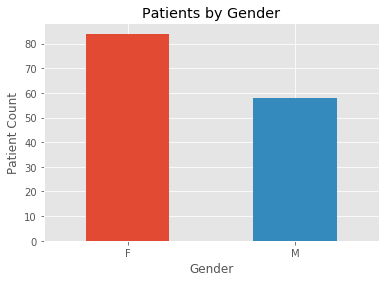

In [12]:
# generate bar graph for visualizing patient by gender
gender_count = keep_first.groupby('Gender').count()['Subject ID']
gender_bar = gender_count.plot(kind='bar',grid=True,title='Patients by Gender',rot=0)
plt.ylabel('Patient Count')
print(gender_count)

plt.savefig('gender_bar.png')

Group
Demented       70
Nondemented    72
Name: Subject ID, dtype: int64


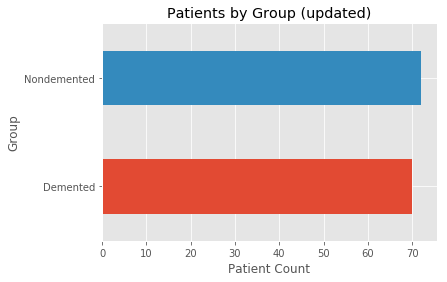

In [13]:
# another bar graph for patients across groups, using these changes
group_count = keep_last.groupby('Group').count()['Subject ID']
group_bar = group_count.plot(kind='barh',grid=True,title='Patients by Group (updated)')
plt.xlabel('Patient Count')
print(group_count)

plt.savefig('group_bar.png')

Group
Demented       12.0
Nondemented     7.0
dtype: float64

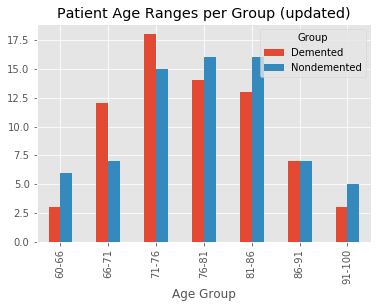

In [37]:
# cut patients into groups based on age bins
bins = [60,66,71,76,81,86,91,100]
groups = [f'{holder}-{bins[i+1]}' for i, holder in enumerate(bins[:-1])]
keep_last['Age Group'] = pd.cut(keep_last['Age'],bins,labels=groups,include_lowest=True)

# display in stacked bar graph
group_by_age = keep_last.groupby(['Age Group','Group']).count()['Subject ID'].unstack()
group_stacked = group_by_age.plot(kind='bar',grid=True,title='Patient Age Ranges per Group (updated)')
group_by_age.sum() # must equal 142 patients

group_by_age.median()

# plt.savefig('age_group_stacked.png')

,EDU
Group,
Demented,14
Nondemented,16


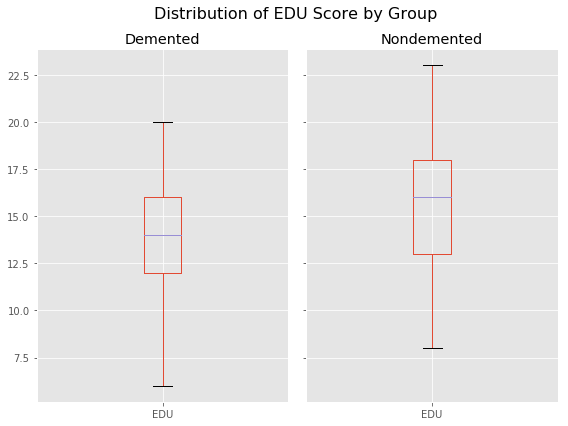

In [40]:
# generate box plot for edu score by group
# age_by_edu = keep_last.groupby(['EDU','Group']).count()['Subject ID'].unstack()
age_by_edu = keep_last[['Group','EDU']].groupby('Group')
age_by_edu.head(35)

edu_box = age_by_edu.boxplot(figsize=(8,6))
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.ylabel('EDU Score')
plt.suptitle('Distribution of EDU Score by Group',x=0.52,size=16)
age_by_edu.median()

# plt.savefig('edu_age_box.png')

SES
1.0    18
2.0    15
3.0    18
4.0    17
5.0     2
Name: Subject ID, dtype: int64


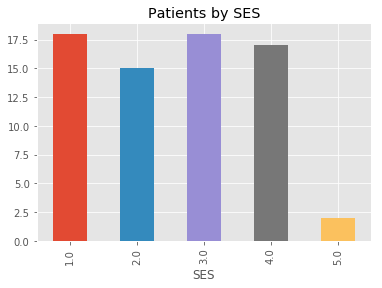

In [39]:
# generate bar graph for visualizing patient by SES
ses_count = keep_first.drop_duplicates(['Subject ID']).loc[keep_first['Group'] == 'Demented'].groupby('SES').count()['Subject ID']
ses_bar = ses_count.plot(kind='bar',grid=True,title='Patients by SES')
print(ses_count)

plt.savefig('ses_bar.png')

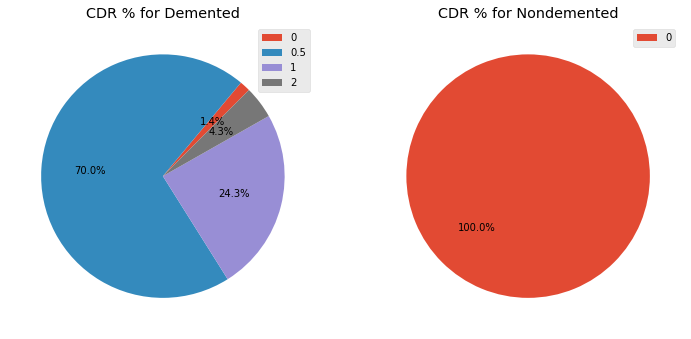

In [20]:
labels=[0,0.5,1,2]
fig,(ax1,ax2) = plt.subplots(1,2,subplot_kw={'aspect':'equal'},figsize=(12,12))
cdr_grouped_demented = keep_last.loc[keep_last['Group'] == 'Demented'].groupby(['CDR']).count()['Subject ID']
cdr_grouped_nondemented = keep_last.loc[keep_last['Group'] == 'Nondemented'].groupby(['CDR']).count()['Subject ID']

ax1.pie(cdr_grouped_demented,startangle=45, autopct="%1.1f%%")
ax1.set_title('CDR % for Demented')
ax1.legend(labels=labels,loc='best')

ax2.pie(cdr_grouped_nondemented,startangle=45, autopct="%1.1f%%")
ax2.set_title('CDR % for Nondemented')
ax2.legend(labels=labels,loc='best')

plt.savefig('cdr_pie.png')

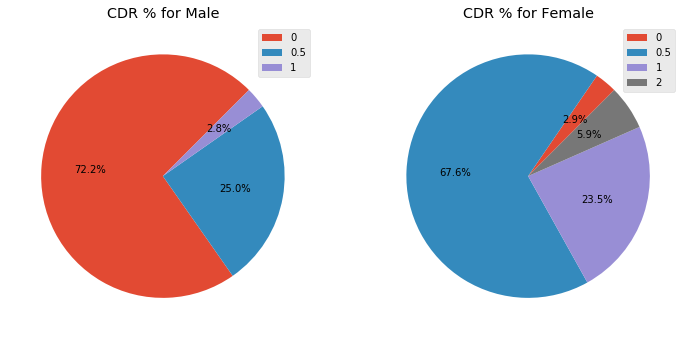

In [19]:
labels=[0,0.5,1,2]
fig,(ax1,ax2) = plt.subplots(1,2,subplot_kw={'aspect':'equal'},figsize=(12,12))
cdr_grouped_male = keep_last.loc[keep_last['Group'] == 'Demented'].loc[keep_last['Gender'] == 'M'].groupby(['CDR']).count()['Subject ID']
cdr_grouped_female = keep_last.loc[keep_last['Group'] == 'Demented'].loc[keep_last['Gender'] == 'F'].groupby(['CDR']).count()['Subject ID']

ax1.pie(cdr_grouped_male,startangle=45, autopct="%1.1f%%")
ax1.set_title('CDR % for Male')
ax1.legend(labels=labels,loc='best')

ax2.pie(cdr_grouped_female,startangle=45, autopct="%1.1f%%")
ax2.set_title('CDR % for Female')
ax2.legend(labels=labels,loc='best')

# plt.savefig('cdr_pie.png')

,MMSE
Group,
Demented,26.0
Nondemented,29.0


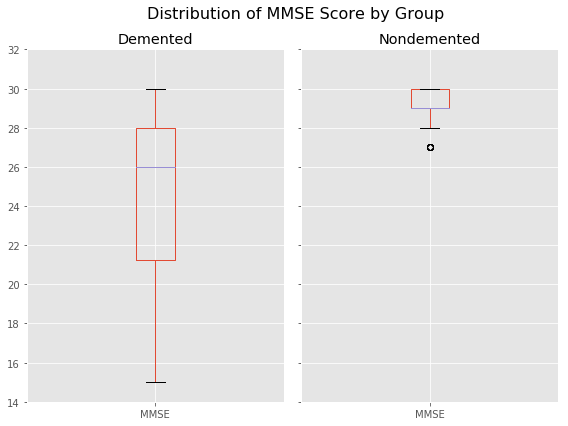

In [41]:
# generate box plot for edu score by group
age_by_edu = keep_last[['Group','MMSE']].groupby('Group')
age_by_edu.head()

edu_box = age_by_edu.boxplot(figsize=(8,6))
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.ylabel('MMSE Score')
plt.ylim(14,32)
plt.suptitle('Distribution of MMSE Score by Group',x=0.52,size=16)
age_by_edu.median()

# plt.savefig('mmse_group_box.png')

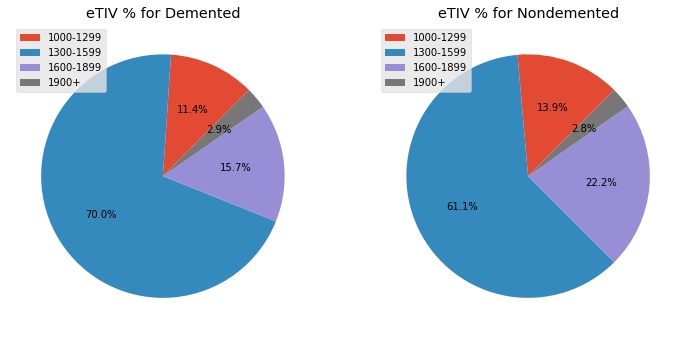

In [19]:
etiv_bins = [1000, 1300, 1600, 1900, 2200]
etiv_group = ['1000-1299', '1300-1599', '1600-1899', '1900+']

keep_last['eTIV Group'] = pd.cut(keep_last['eTIV'], bins = etiv_bins, labels=etiv_group)

fig,(ax1,ax2) = plt.subplots(1,2,subplot_kw={'aspect':'equal'},figsize=(12,12))
etiv_grouped_demented = keep_last.loc[keep_last['Group'] == 'Demented'].groupby(['eTIV Group']).count()['Subject ID']
etiv_grouped_nondemented = keep_last.loc[keep_last['Group'] == 'Nondemented'].groupby(['eTIV Group']).count()['Subject ID']

ax1.pie(etiv_grouped_demented,startangle=45, autopct="%1.1f%%")
ax1.set_title('eTIV % for Demented')
ax1.legend(labels=etiv_group,loc='best')

ax2.pie(etiv_grouped_nondemented,startangle=45, autopct="%1.1f%%")
ax2.set_title('eTIV % for Nondemented')
ax2.legend(labels=etiv_group,loc='best')

plt.savefig('tiv_pie.png')

Group
Demented       0.6995
Nondemented    0.7345
Name: nWBV, dtype: float64

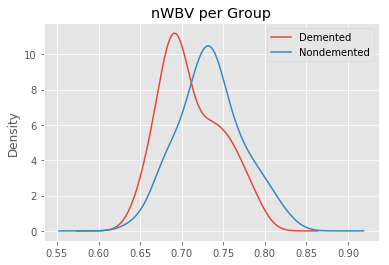

In [36]:
# density plot for wbv per group
keep_last.groupby('Group')['nWBV'].plot.kde()
plt.legend()
plt.title('nWBV per Group')
keep_last.groupby('Group')['nWBV'].median()

# plt.savefig('wbv_dens.png')

Gender
F    26.0
M    26.0
Name: MMSE, dtype: float64

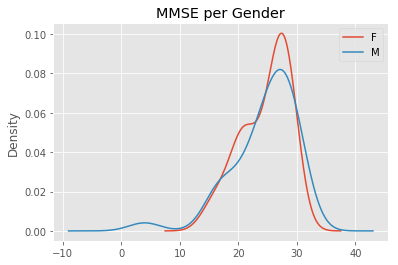

In [44]:
# density plot for MMSE by gender
keep_last.loc[keep_last['Group'] == 'Demented'].groupby('Gender')['MMSE'].plot.kde()
plt.legend()
plt.title('MMSE per Gender')
keep_last.loc[keep_last['Group'] == 'Demented'].groupby('Gender')['MMSE'].median()

# plt.savefig('mmse_gender_dens.png')

Gender
F    0.5
M    0.5
Name: CDR, dtype: float64

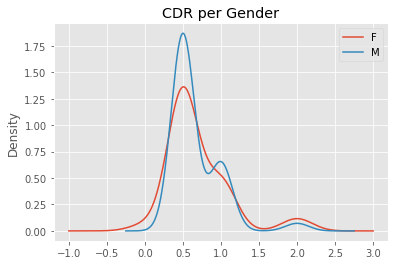

In [45]:
# density plot for CDR by gender
keep_last.loc[keep_last['Group'] == 'Demented'].groupby('Gender')['CDR'].plot.kde()
plt.legend()
plt.title('CDR per Gender')
keep_last.loc[keep_last['Group'] == 'Demented'].groupby('Gender')['CDR'].median()

# plt.savefig('cdr_gender_dens.png')

Gender
F    1401.5
M    1553.0
Name: eTIV, dtype: float64

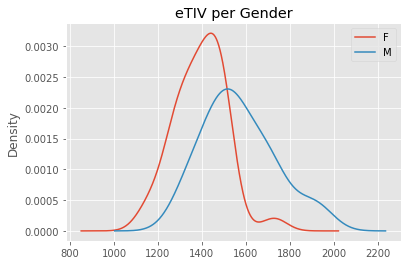

In [47]:
# density plot for eTIV by gender
keep_last.loc[keep_last['Group'] == 'Demented'].groupby('Gender')['eTIV'].plot.kde()
plt.legend()
plt.title('eTIV per Gender')
keep_last.loc[keep_last['Group'] == 'Demented'].groupby('Gender')['eTIV'].median()

# plt.savefig('etiv_gender_dens.png')

Gender
F    0.708
M    0.696
Name: nWBV, dtype: float64

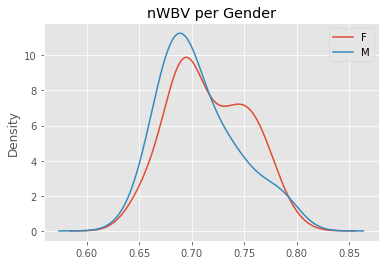

In [46]:
# density plot for nWBV by gender
keep_last.loc[keep_last['Group'] == 'Demented'].groupby('Gender')['nWBV'].plot.kde()
plt.legend()
plt.title('nWBV per Gender')
keep_last.loc[keep_last['Group'] == 'Demented'].groupby('Gender')['nWBV'].median()
# plt.savefig('nwbv_gender_dens.png')

In [21]:
# not significant: SES, eTIV
# significant: MMSE, CDR, nWBV

# interestingly, # of visits is significant with nondemented having more visits
# we want significant difference to prove this data was not randomly selected
# instead specifically selected from patient populations of demented and nondemented
# just proves this is non-random, not very relevant to our analysis

The difference in sample means for SES is not significant. (p-val = 0.10000255625169246)
The difference in sample means for eTIV is not significant. (p-val = 0.9112542043942281)


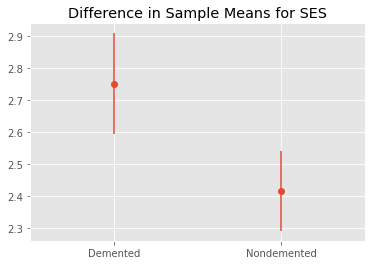

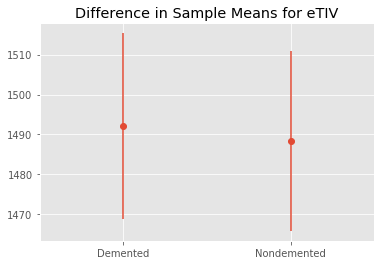

In [22]:
# non-significant groups: SES, eTIV
arr = ['SES','eTIV']
for i in arr:
    pop1 = keep_last.loc[df['Group'] == 'Demented'][i]
    pop2 = keep_last.loc[df['Group'] == 'Nondemented'][i]

    (t_stat, p) = ttest_ind(pop1, pop2, equal_var=False)

    if p < 0.05:
        print(f'The difference in sample means for {i} is significant. (p-val = {p})')
    else:
        print(f'The difference in sample means for {i} is not significant. (p-val = {p})')
    
    m1 = keep_last.loc[df['Group'] == 'Demented'][i].mean()
    m2 = keep_last.loc[df['Group'] == 'Nondemented'][i].mean()

    s1 = keep_last.loc[df['Group'] == 'Demented'][i].sem()
    s2 = keep_last.loc[df['Group'] == 'Nondemented'][i].sem()

    means = [m1,m2]
    sems = [s1,s2]
    
    fig, ax = plt.subplots()
    x_axis = np.arange(0, len(means))
    ax.errorbar(x_axis, means, yerr=sems, fmt="o")
    
    ax.set_xticks([0, 1])
    ax.set_xlim(-0.5, 1.5)
    ax.set_xticklabels(['Demented','Nondemented'])
    ax.set_title(f'Difference in Sample Means for {i}')
    
    plt.savefig(i.lower()+'_errbar.png')

The difference in sample means for CDR is significant. (p-val = 2.774726000279253e-20)
The difference in sample means for MMSE is significant. (p-val = 5.0656298541838416e-11)
The difference in sample means for nWBV is significant. (p-val = 0.0003316323364842938)
The difference in sample means for EDU is significant. (p-val = 0.012961199427353335)
The difference in sample means for Visit is significant. (p-val = 0.0036010973727059856)


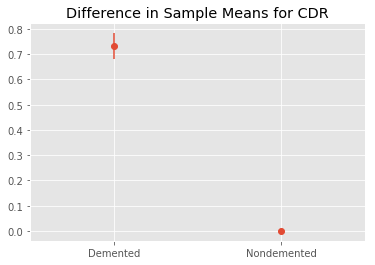

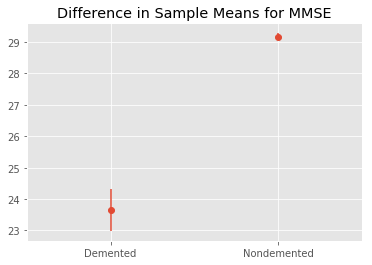

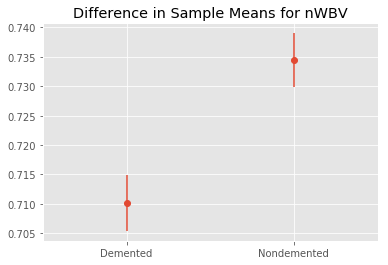

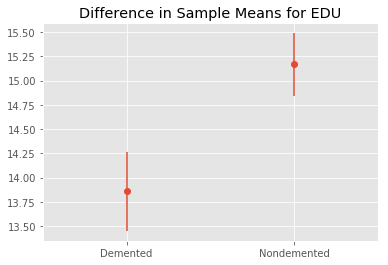

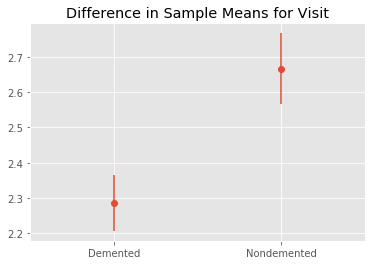

In [23]:
# significant groups: MMSE, CDR, nWBV
arr = ['CDR','MMSE','nWBV','EDU','Visit']
for i in arr:
    pop1 = keep_last.loc[df['Group'] == 'Demented'][i]
    pop2 = keep_last.loc[df['Group'] == 'Nondemented'][i]

    (t_stat, p) = ttest_ind(pop1, pop2, equal_var=False)

    if p < 0.05:
        print(f'The difference in sample means for {i} is significant. (p-val = {p})')
    else:
        print(f'The difference in sample means for {i} is not significant. (p-val = {p})')
    
    m1 = keep_last.loc[df['Group'] == 'Demented'][i].mean()
    m2 = keep_last.loc[df['Group'] == 'Nondemented'][i].mean()

    s1 = keep_last.loc[df['Group'] == 'Demented'][i].sem()
    s2 = keep_last.loc[df['Group'] == 'Nondemented'][i].sem()

    means = [m1,m2]
    sems = [s1,s2]
    
    fig, ax = plt.subplots()
    x_axis = np.arange(0, len(means))
    ax.errorbar(x_axis, means, yerr=sems, fmt="o")
    
    ax.set_xticks([0, 1])
    ax.set_xlim(-0.5, 1.5)
    ax.set_xticklabels(['Demented','Nondemented'])
    ax.set_title(f'Difference in Sample Means for {i}')
    
    plt.savefig(i.lower()+'_errbar.png')

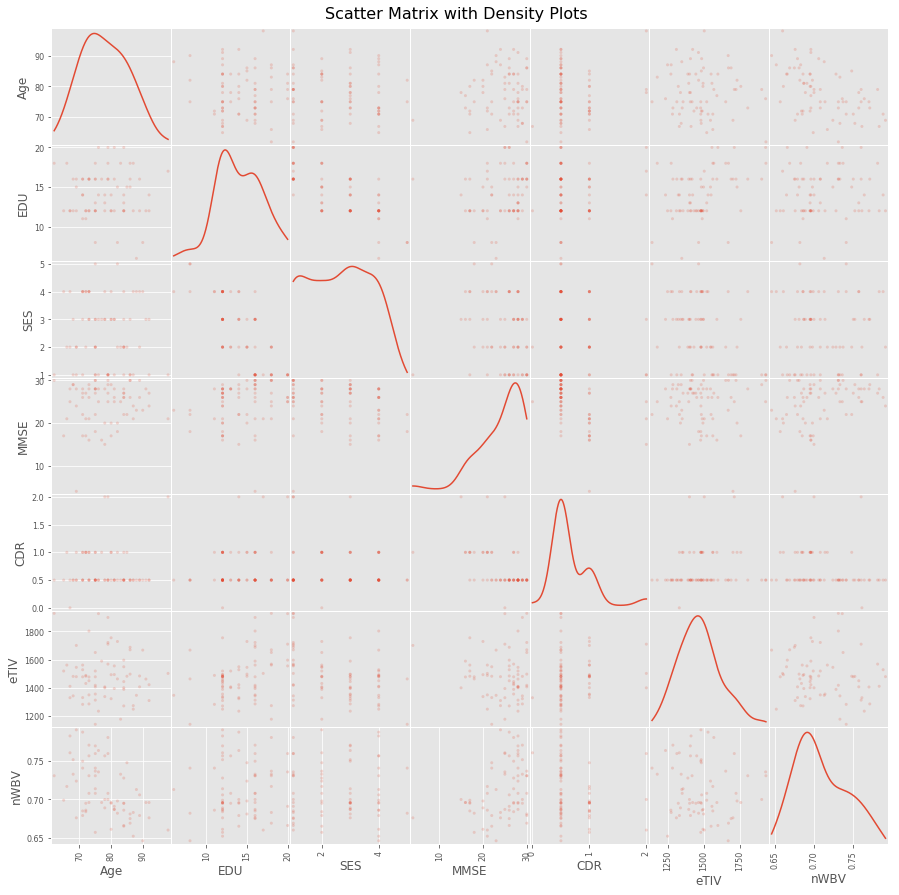

In [48]:
# pull necessary columns for scatter matrix
matrix_data = keep_last.loc[keep_last['Group'] == 'Demented'][['Age','EDU','SES','MMSE','CDR','eTIV','nWBV']]

# matrix plot with density plots instead of histograms
scatter_matrix = pd.plotting.scatter_matrix(matrix_data, alpha=0.2,diagonal='kde',figsize=(15,15),grid=True)
plt.suptitle('Scatter Matrix with Density Plots',size=16,y=0.9)
plt.savefig('matrix.png')

In [30]:
# pull necessary columns for colorplot
corr_data = keep_last[['Group','Gender','Age','EDU','SES','MMSE','CDR','eTIV','nWBV']]

# replace categorical variables with quantitative data
corr_data['Gender'] = corr_data['Gender'].replace(['M','F'], [0,1])
corr_data['Group'] = corr_data['Group'].replace(['Demented','Nondemented'], [0,1])

# calculate correlation coefficients
cr = corr_data.corr()
cr

,Group,Gender,Age,EDU_scaled,SES,MMSE,CDR,eTIV,nWBV
Group,1.000000,0.212298,0.041553,0.182337,-0.068819,0.560806,-0.802757,0.012461,0.296700
Gender,0.212298,1.000000,0.042598,-0.071600,0.033024,0.128088,-0.155895,-0.571313,0.215979
Age,0.041553,0.042598,1.000000,-0.037720,-0.031277,0.072288,-0.008655,0.032403,-0.518863
EDU_scaled,0.182337,-0.071600,-0.037720,1.000000,-0.725763,0.219569,-0.082479,0.231579,0.032065
SES,-0.068819,0.033024,-0.031277,-0.725763,1.000000,-0.176053,0.016074,-0.246236,0.056351
MMSE,0.560806,0.128088,0.072288,0.219569,-0.176053,1.000000,-0.688630,-0.003960,0.351268
CDR,-0.802757,-0.155895,-0.008655,-0.082479,0.016074,-0.688630,1.000000,0.040792,-0.322060
eTIV,0.012461,-0.571313,0.032403,0.231579,-0.246236,-0.003960,0.040792,1.000000,-0.217220
nWBV,0.296700,0.215979,-0.518863,0.032065,0.056351,0.351268,-0.322060,-0.217220,1.000000


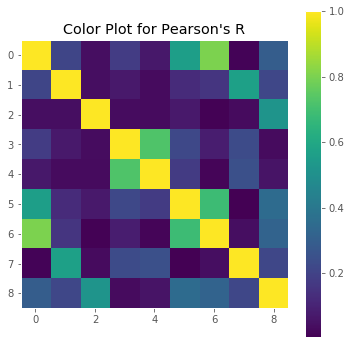

In [26]:
# take absolute value for readable color plot
cr_abs = cr.abs()

# visualize highest correlation coefficients
# use absolute value for clarity
fig, ax = plt.subplots(figsize=(6,6))
plt.imshow(cr_abs)
plt.colorbar()
plt.grid(b=False)
plt.title("Color Plot for Pearson's R")
plt.savefig('colormap.png')

pearsons r:-0.8027571865207666


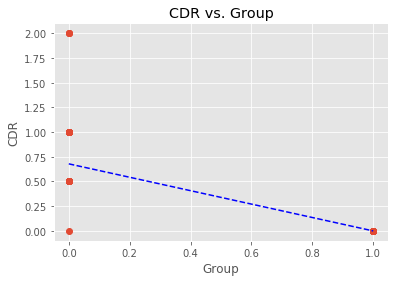

In [27]:
# scatter plot for CDR vs. Group
temp = pd.DataFrame(corr_data[['Group', 'CDR']])
temp = temp.reset_index()

slope, intercept, r_val, p_val, stdev = linregress(corr_data['Group'], corr_data['CDR'])
fit = slope * corr_data['Group'] + intercept
fig, ax = plt.subplots()
ax.plot(corr_data['Group'], corr_data['CDR'], linewidth=0, marker='o')
ax.plot(corr_data['Group'], fit, 'b--')

plt.title('CDR vs. Group')
plt.xlabel('Group')
plt.ylabel('CDR')

print(f'pearsons r:{r_val}')
plt.savefig('group_v_cdr.png')

pearsons r:-0.7257629313345646


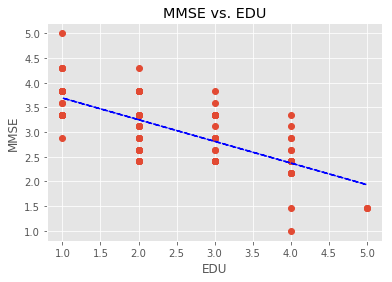

In [31]:
# scatter plot for MMSE vs. EDU
temp = pd.DataFrame(corr_data[['SES', 'EDU']])
temp = temp.reset_index()

slope, intercept, r_val, p_val, stdev = linregress(corr_data['SES'], corr_data['EDU'])
fit = slope * corr_data['SES'] + intercept
fig, ax = plt.subplots()
ax.plot(corr_data['SES'], corr_data['EDU'], linewidth=0, marker='o')
ax.plot(corr_data['SES'], fit, 'b--')

plt.title('MMSE vs. EDU')
plt.xlabel('EDU')
plt.ylabel('MMSE')

print(f'pearsons r:{r_val}')
plt.savefig('ses_v_edu.png')

pearsons r:-0.688629766665064


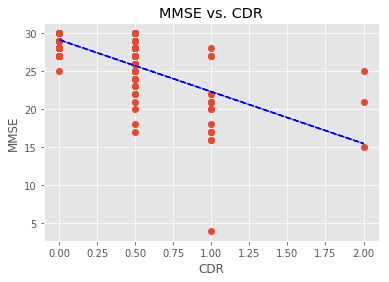

In [29]:
# scatter plot for MMSE vs. CDR
temp = pd.DataFrame(corr_data[['CDR', 'MMSE']])
temp = temp.reset_index()

slope, intercept, r_val, p_val, stdev = linregress(corr_data['CDR'], corr_data['MMSE'])
fit = slope * corr_data['CDR'] + intercept
fig, ax = plt.subplots()
ax.plot(corr_data['CDR'], corr_data['MMSE'], linewidth=0, marker='o')
ax.plot(corr_data['CDR'], fit, 'b--')

plt.title('MMSE vs. CDR')
plt.xlabel('CDR')
plt.ylabel('MMSE')

print(f'pearsons r:{r_val}')
plt.savefig('mmse_v_cdr.png')